In [152]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import os, sys
import scipy.io
import gsw

In [153]:
input_path = f"../../MITgcm/experiments/BLT_realistic/input/"
print(input_path)
if ~os.path.exists("/".join(input_path.split("/")[0:-2])):
    os.system(f"mkdir -p {input_path}")

../../MITgcm/experiments/BLT_realistic/input/


In [154]:
# Release location
dye_loc = [-11.885, 54.21]

## Physical parameters

In [155]:
# environmental parameters
ω = 2*3.14159265359/(12*3600)

ϕdye = np.deg2rad(dye_loc[1])
f = 4*np.pi/86400.*np.sin(ϕdye)
f = np.round(f/ω*24.)*ω/24
print(f"f = {f}")

gravity = 9.81

# grid param
nx = 192
ny = 80
nz = 250

dx = 100
dy = 100
dz0 = 4.
nz_vary_frac = 0.64

Lx = nx*dx
Ly = ny*dy
print(f"Lx = {Lx*1e-3}, Ly = {Ly*1e-3}")

k0 = 5.2e-5

f = 0.00011514324926352239
Lx = 19.2, Ly = 8.0


## BBTRE Topography

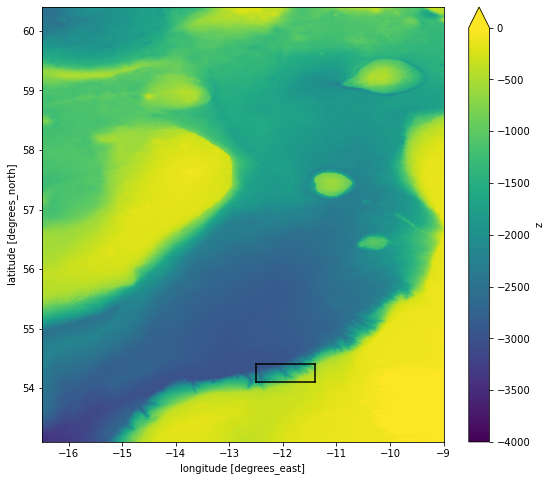

In [156]:
lon_zoom = [-12.5,-11.4]
lat_zoom = [54.1,54.4]

ds = xr.open_dataset("../../data/Tozer2019_bathymetry.nc")
ds = ds.sel(lon=slice(-16.5,-9), lat=slice(53.1,60.4))
plt.figure(figsize=(9,8))
ds['z'].plot(vmin=-4000, vmax=0, cmap="viridis")
plt.plot([lon_zoom[0], lon_zoom[0]], [lat_zoom[0], lat_zoom[1]], "k-")
plt.plot([lon_zoom[0], lon_zoom[1]], [lat_zoom[0], lat_zoom[0]], "k-")
plt.plot([lon_zoom[1], lon_zoom[1]], [lat_zoom[0], lat_zoom[1]], "k-")
plt.plot([lon_zoom[0], lon_zoom[1]], [lat_zoom[1], lat_zoom[1]], "k-")

ds = ds.sel(lon=slice(lon_zoom[0], lon_zoom[1]), lat=slice(lat_zoom[0], lat_zoom[1]))

In [157]:
mat = scipy.io.loadmat('../../data/Rockall_bathymetry/Rockall_swath.mat')

lon = mat["gsi"][0][0][0].squeeze()
lat = mat["gsi"][0][0][1].squeeze()

ii = (-12.5 < lon) & (lon < -11.4)
jj = (54.1 < lat) & (lat < 54.4)
ij = ii[:, np.newaxis] * jj[np.newaxis, :]

lon = lon[ii]
lat = lat[jj]
dep = mat["gsi"][0][0][2][ij].reshape(lon.size, lat.size).transpose()

<ipython-input-158-d2d669e1c484>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(Slon, Slat, Sdep)
<ipython-input-158-d2d669e1c484>:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(Slon, Slat, Sdep, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")
<ipython-input-158-d2d669e1c484>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(lon, lat, dep)
<ipy

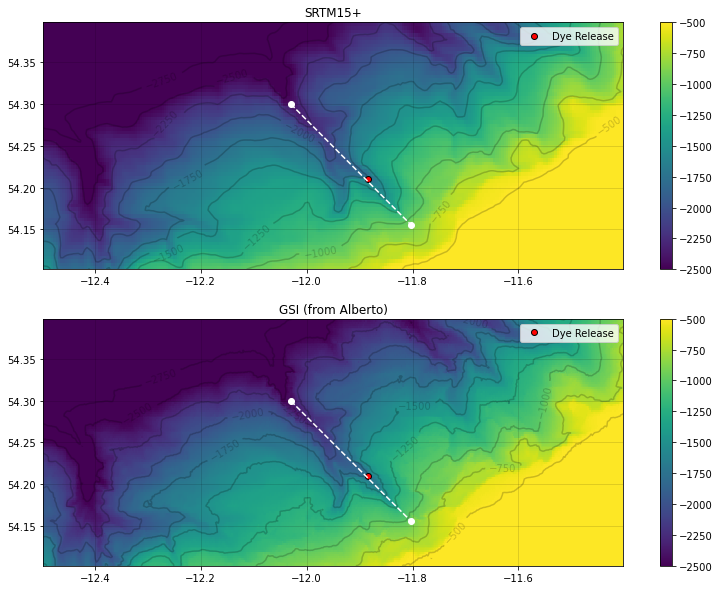

In [158]:
Slon = ds["lon"].values.squeeze()
Slat = ds["lat"].values.squeeze()
Sdep = ds["z"].values.squeeze()

lats_deg = [54.3, 54.155]; lons_deg = [-12.03, -11.8025]

plt.figure(figsize=(13, 10))
plt.subplot(2,1,1)
plt.title("SRTM15+")
plt.pcolor(Slon, Slat, Sdep)
plt.colorbar()
plt.clim(-2500, -500)
CS = plt.contour(Slon, Slat, Sdep, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.plot(dye_loc[0], dye_loc[1], "ro", label="Dye Release", markeredgecolor="k")
plt.plot(lons_deg, lats_deg, 'wo--')
plt.legend()
plt.grid(True, color="k", alpha=0.15)


plt.subplot(2,1,2)
plt.title("GSI (from Alberto)")
plt.pcolor(lon, lat, dep)
plt.colorbar()
plt.clim(-2500, -500)
CS = plt.contour(lon, lat, dep, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.plot(dye_loc[0], dye_loc[1], "ro", label="Dye Release", markeredgecolor="k")
plt.plot(lons_deg, lats_deg, 'wo--')
plt.legend()
plt.grid(True, color="k", alpha=0.15)

In [159]:
# Pick the GSI topography because it has more roughness
da = xr.DataArray(dep[::-1, :], coords=(lat[::-1], lon,), dims=("lat", "lon",))
ds = xr.Dataset({"z": da})

<xarray.Dataset>
Dimensions:  (lat: 133, lon: 488)
Coordinates:
  * lat      (lat) float64 54.1 54.1 54.11 54.11 54.11 ... 54.39 54.39 54.4 54.4
  * lon      (lon) float64 -12.5 -12.5 -12.49 -12.49 ... -11.41 -11.4 -11.4
    X        (lon) float64 0.0 146.3 292.6 ... 7.096e+04 7.111e+04 7.126e+04
    Y        (lat) float64 0.0 250.2 500.4 ... 3.252e+04 3.277e+04 3.302e+04
Data variables:
    z        (lat, lon) float64 -1.494e+03 -1.498e+03 ... -815.1 -812.2

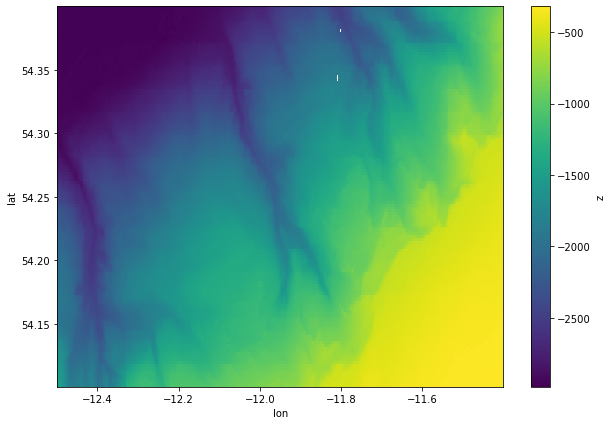

In [160]:
ds = ds.sel(lon=slice(lon_zoom[0], lon_zoom[1]), lat=slice(lat_zoom[0], lat_zoom[1]))

R = 6.371e6
circ = 2.*np.pi*R

ds = ds.assign_coords({
    'X': (ds['lon'] - ds['lon'].isel(lon=0)) * circ/360. * np.cos(np.deg2rad(ds['lat'].sel(lat=dye_loc[1], method='nearest'))),
    'Y': (ds['lat'] - ds['lat'].isel(lat=0)) * circ/360.
})

plt.figure(figsize=(10,7))
ds['z'].plot()
ds.to_netcdf(input_path+"geocoords_original.nc")

ds

/home/hdrake/.conda/envs/bblturb-analysis/lib/python3.9/site-packages/xarray/plot/plot.py:932: UserWarning: The following kwargs were not used by contour: 'linewidth'
  primitive = ax.contour(x, y, z, **kwargs)


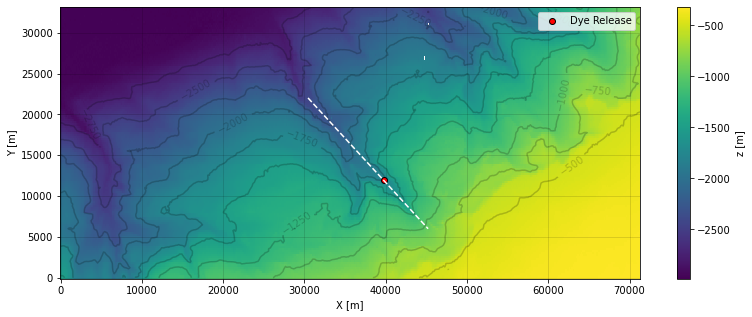

In [161]:
plt.figure(figsize=(13, 5))

ax = plt.subplot(1,1,1)
lats_dist = ds['Y'].sel(lat=lats_deg, method='nearest')
lons_dist = ds['X'].sel(lon=lons_deg, method='nearest')

dye_loc_xy = [ds['X'].sel(lon=[dye_loc[0]], method='nearest'), ds['Y'].sel(lat=[dye_loc[1]], method='nearest')]
plt.plot(dye_loc_xy[0], dye_loc_xy[1], "ro", label="Dye Release", markeredgecolor="k")

q = ds['z'].plot(x='X', y='Y')
q.colorbar.set_label('z [m]')
CS = ds['z'].plot.contour(x="X", y="Y", ax=ax, colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.plot(lons_dist, lats_dist, 'w--')

plt.legend()
plt.grid(True, color="k", alpha=0.15)

#### Rotate into along-canyon and cross-canyon coordinates

In [162]:
ϕ1 = np.arctan(np.diff(lats_dist)/np.diff(lons_dist))

In [163]:
Xr_1d = np.arange(0., Lx, dx)[np.newaxis,:]
Yr_1d = np.arange(0., Ly, dy)[:,np.newaxis]

#### Interpolate onto subdomain with new rotated coordinate frame

In [164]:
X = xr.DataArray(
    data = Xr_1d*np.cos(ϕ1) - Yr_1d*np.sin(ϕ1),
    coords = {'Yr': Yr_1d.flatten(), 'Xr': Xr_1d.flatten()},
    dims = ['Yr', 'Xr']
)
Y = xr.DataArray(
    data = Yr_1d*np.cos(ϕ1) + Xr_1d*np.sin(ϕ1),
    coords = {'Yr': Yr_1d.flatten(), 'Xr': Xr_1d.flatten()},
    dims = ['Yr', 'Xr']
)

<xarray.Dataset>
Dimensions:  (Xr: 192, Yr: 80)
Coordinates:
    lat      (Yr, Xr) float64 54.28 54.27 54.27 54.27 ... 54.2 54.2 54.2 54.2
    lon      (Yr, Xr) float64 -12.08 -12.07 -12.07 ... -11.79 -11.79 -11.79
    X        float64 3.043e+04
    Y        float64 2.202e+04
  * Yr       (Yr) float64 0.0 100.0 200.0 300.0 ... 7.7e+03 7.8e+03 7.9e+03
  * Xr       (Xr) float64 0.0 100.0 200.0 300.0 ... 1.89e+04 1.9e+04 1.91e+04
Data variables:
    z        (Yr, Xr) float64 -1.87e+03 -1.864e+03 -1.86e+03 ... -985.7 -976.3

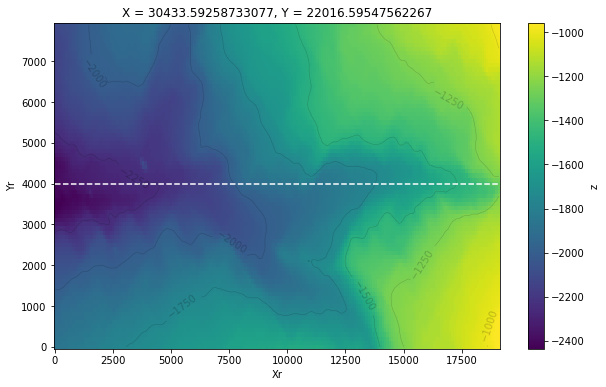

In [165]:
newds = xr.Dataset()
Δx = (Ly/2)*np.sin(ϕ1)
Δy = -(Ly/2)*np.cos(ϕ1)
newds['z'] = (
    ds['z']
    .swap_dims({'lon':'X', 'lat':'Y'})
    .interp(X=X+lons_dist[0]+Δx, Y=Y+lats_dist[0]+Δy)
)

plt.figure(figsize=(10,6))
newds['z'].plot()
CS = newds['z'].plot.contour(colors="k", levels=np.arange(-3000, 0, 250), linewidths=0.5, alpha=0.2, linestyles="solid")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.plot(newds['Xr'], 0.*newds['Xr'] + Ly*0.5, "w--")
newds

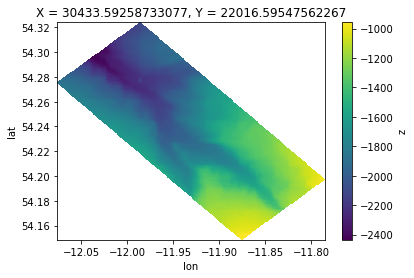

In [166]:
newds['z'].plot(x='lon', y='lat')

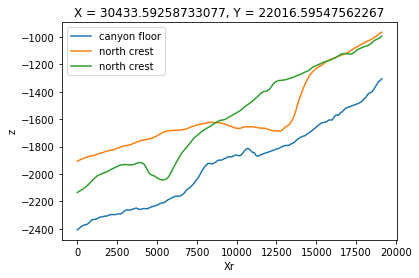

In [167]:
newds['z'].sel(Yr=Ly/2, method='nearest').plot(label='canyon floor')
newds['z'].isel(Yr=slice(0, 10)).mean("Yr").plot(label='north crest')
newds['z'].isel(Yr=slice(-10, None)).mean("Yr").plot(label='north crest')
plt.legend()

#### Remove (and record) mean slope of canyon

In [168]:
slopeAngle, b = np.polyfit(newds['Xr'], newds['z'].isel(Yr=slice(ny//2-10,ny//2+10)).mean(dim="Yr"), deg=1)
print(f"θ = {slopeAngle}")

newds['z_slope'] = slopeAngle * newds['Xr'] + b

newds['z_with_slope'] = newds['z'].copy()
newds['z'] = newds['z'] - newds['z_slope']

θ = 0.058817189569051985


#### Smooth topography near periodic boundaries

In [169]:
nx_smooth = 7
for i in range(nx_smooth):
    newds['z'].loc[{'Xr': newds['Xr'].isel(Xr=-nx_smooth//2+i)}] = (
        newds['z'].loc[{'Xr': newds['Xr'].isel(Xr=-nx_smooth//2)}] +
        i/nx_smooth*(
            newds['z'].loc[{'Xr': newds['Xr'].isel(Xr=-nx_smooth//2+nx_smooth)}] -
            newds['z'].loc[{'Xr': newds['Xr'].isel(Xr=-nx_smooth//2)}]
        )
    )
    
ny_smooth = 11
for j in range(ny_smooth):
    newds['z'].loc[{'Yr': newds['Yr'].isel(Yr=-ny_smooth//2+j)}] = (
        newds['z'].loc[{'Yr': newds['Yr'].isel(Yr=-ny_smooth//2)}] +
        j/ny_smooth*(
            newds['z'].loc[{'Yr': newds['Yr'].isel(Yr=-ny_smooth//2+ny_smooth)}] -
            newds['z'].loc[{'Yr': newds['Yr'].isel(Yr=-ny_smooth//2)}]
        )
    )

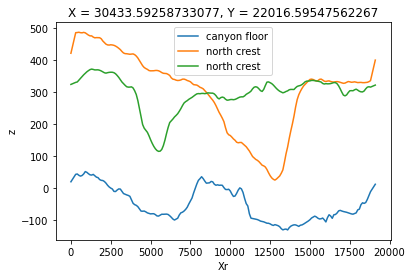

In [170]:
newds['z'].sel(Yr=Ly//2, method='nearest').plot(label='canyon floor')
newds['z'].isel(Yr=slice(0, 10)).mean("Yr").plot(label='north crest')
newds['z'].isel(Yr=slice(-10, None)).mean("Yr").plot(label='north crest')

plt.legend()

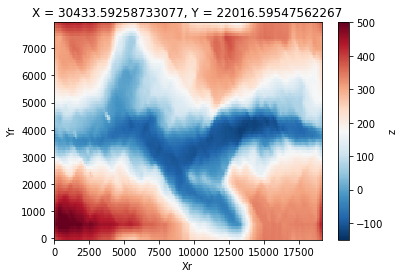

In [171]:
q = newds['z'].plot()
q.set_clim([-150, 500])

#### Stretched vertical grid

<ipython-input-172-e3a51752d869>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  nz_vary = np.int(nz*nz_vary_frac)


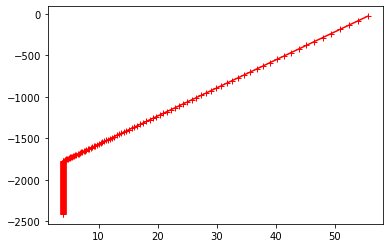

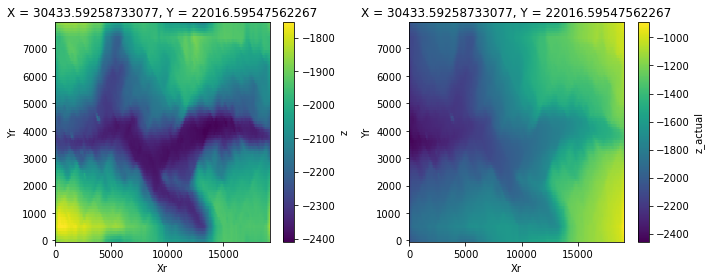

In [172]:
nz_vary = np.int(nz*nz_vary_frac)
dz = dz0 * np.ones((nz))[:,np.newaxis,np.newaxis]*np.ones((nz,ny,nx))
dz[nz_vary:,:,:] = dz[nz_vary,0,0]*1.03**np.arange(0,nz-nz_vary,1.0)[:,np.newaxis,np.newaxis]*np.ones((nz-nz_vary,ny,nx))
Hz = sum(dz[:,0,0])

x = np.arange(dx/2.0,Lx,dx)[np.newaxis,np.newaxis,:]*np.ones((nz,ny,nx))
y = np.arange(dy/2.0,Ly,dy)[np.newaxis,:,np.newaxis]*np.ones((nz,ny,nx))
z = (-Hz + np.cumsum(dz,axis=0) - dz/2.0)

min_elv = newds['z'].min().values # minimum elevation
Hbot = newds['z'] - min_elv - (Hz - dz0)
Hremoved = newds['z_slope'] + min_elv
newds['z_actual'] = newds['z'] + newds['z_slope']

plt.figure()
plt.plot(dz[:,0,0],z[:,0,0],"r-+")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
Hbot.plot()
plt.subplot(1,2,2)
newds['z_actual'].plot()
plt.tight_layout()

newds.attrs['min_elv'] = min_elv
newds.attrs['Hz'] = Hz
newds.attrs['dz0'] = dz0

#### Realistic initial conditions from pilot data

In [173]:
pilot = scipy.io.loadmat('../../data/BLT_pilot/Rockall_RT_CTD_MHAproc.mat')

In [174]:
axis = pilot["CTD_all"][0][0]
var_names = str(pilot["CTD_all"][0][1].dtype)[3:-3].split("'), ('")
var_names = [var_name[:-5] for var_name in var_names]
axis = {var_names[i]: axis[0][0][i] for i in range(len(var_names))}

In [175]:
rim = pilot["CTD_all"][0][1]
var_names = str(pilot["CTD_all"][0][1].dtype)[3:-3].split("'), ('")
var_names = [var_name[:-5] for var_name in var_names]
rim = {var_names[i]: rim[0][0][i] for i in range(len(var_names))}

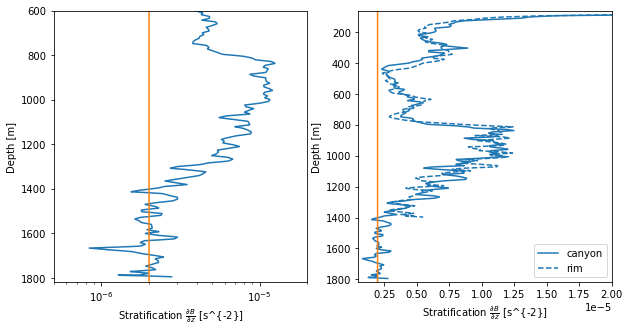

In [176]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
p = axis["p"].astype("float64")
plt.semilogx(axis["n2m"], p)
N20 = 2e-6
N2smooth = N20*np.ones_like(p)
plt.semilogx(N2smooth, p)
plt.ylim(1820, 600)
plt.xlim(5e-7, 2e-5)
plt.ylabel("Depth [m]")
plt.xlabel(r"Stratification $\frac{\partial B}{\partial z}$ [s^{-2}]")


plt.subplot(1,2,2)
p = axis["p"].astype("float64")
plt.plot(axis["n2m"], p, label="canyon")
plt.plot(rim["n2m"], p, "C0--", label="rim")
plt.plot(N2smooth, p)
plt.ylim(1820, 60)
plt.xlim(5e-7, 2e-5)
plt.ylabel("Depth [m]")
plt.xlabel(r"Stratification $\frac{\partial B}{\partial z}$ [s^{-2}]")
plt.legend()

In [177]:
pmax = np.max(p)
Z = z[:, 0, 0] - np.min(z[:, 0, 0])
dZ = dz[:, 0, 0]
N2smooth_interp = np.interp(Z, pmax-p[::-1,0], N2smooth[::-1,0])
bzsmooth_interp = N2smooth_interp - np.max(N2smooth_interp)

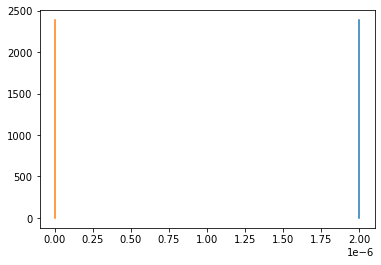

In [178]:
plt.plot(N2smooth_interp, Z)
plt.plot(bzsmooth_interp, Z)

In [179]:
ρ0 = 1000.
g = 9.81
α = gsw.density.alpha(35., 4., 1600.)

In [180]:
B = np.cumsum(N2smooth_interp*dZ)
b = np.cumsum(bzsmooth_interp*dZ)

In [181]:
T0 = B/(g*α)
Tp = b/(g*α)
Tp -= Tp[-1]

Text(0.5, 0, 'Temperature [$^{\\circ}$C]')

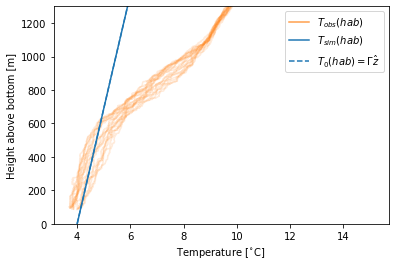

In [182]:
plt.plot(axis["t"], pmax-p, "C1-", alpha=0.15)
plt.plot([], [], "C1", alpha=0.75, label=r"$T_{obs}(hab)$")
plt.plot(T0+4, Z, label=r"$T_{sim}(hab)$")
plt.plot(T0-Tp+4, Z, "C0--", label=r"$T_{0}(hab) = \Gamma \hat{z}$")
plt.ylim(0, 1300)
plt.legend()
plt.ylabel("Height above bottom [m]")
plt.xlabel(r"Temperature [$^{\circ}$C]")

In [183]:
gamma = N20/(g*α)

T = np.transpose(np.tile(Tp, (ny, nx, 1)), (2, 0, 1))

R = np.copy(T)
T += np.random.normal(size=(nz, ny, nx),scale=2.e-8)/(g*α) # Callies2018 initial perturbation

### Estimate barotropic tidal forcing parameters

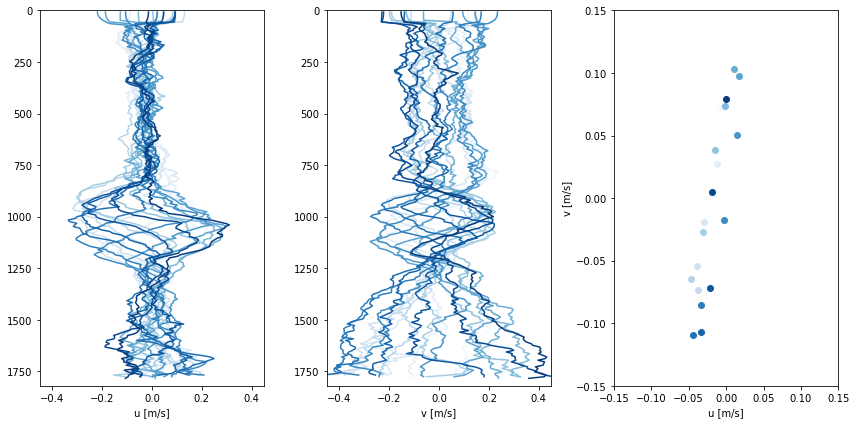

In [184]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
for n, t in enumerate(axis["yday"][0]):
    plt.plot(axis["u"][:, n], p, color=plt.get_cmap("Blues")(n/20))
plt.ylim(1820, 0)
plt.xlabel("u [m/s]")
plt.xlim(-0.45, 0.45)

plt.subplot(1,3,2)
for n, t in enumerate(axis["yday"][0]):
    plt.plot(axis["v"][:, n], p, color=plt.get_cmap("Blues")(n/20))
plt.ylim(1820, 0)
plt.xlim(-0.45, 0.45)
plt.xlabel("v [m/s]")

plt.subplot(1,3,3)
for n, t in enumerate(axis["yday"][0]):
    plt.plot(np.nanmean(axis["u"][:, n]), np.nanmean(axis["v"][:, n]), "o", color=plt.get_cmap("Blues")(n/20))
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.xlabel("u [m/s]")
plt.ylabel("v [m/s]")
plt.tight_layout()

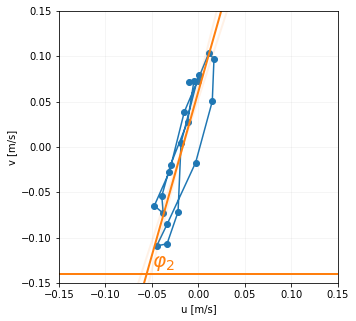

In [185]:
plt.figure(figsize=(5,5))
U = np.nanmean(axis["u"][:, :], axis=0)
V = np.nanmean(axis["v"][:, :], axis=0)
plt.plot(U, V, "o-")
plt.xlim(-0.15, 0.15)
plt.ylim(-0.15, 0.15)
plt.xlabel("u [m/s]")
plt.ylabel("v [m/s]")

a1_, b1_ = np.polyfit(U, V, deg=1)
x_ = np.arange(-0.15, 0.5, 0.01)
a2_, b2_ = np.polyfit(V, U, deg=1)
y_ = np.copy(x_)
plt.plot(x_, a1_*x_+b1_, "C1-", lw=2, alpha=0.1)
plt.plot(a2_*y_+b2_, y_, "C1-", lw=2, alpha=0.1)

a_ = np.mean([a1_, 1/a2_])
b_ = np.mean([b1_, -b2_/a2_])
plt.plot(x_, a_*x_+b_, "C1-", lw=2)
ϕ2 = np.arctan(a_)

plt.plot(x_, 0.*x_-0.14, "C1-", lw=2)
plt.annotate(text=r"$\varphi_{2}$", xy=(-0.05, -0.132), color="C1", fontsize=20)
plt.grid(True, alpha=0.15)

In [186]:
ϕ = (ϕ2 - ϕ1)[0]

In [187]:
scale_down = 2.5
U0relax = np.max(np.sqrt(U**2 + V**2)) / scale_down

Text(0.5, 0, 'hours')

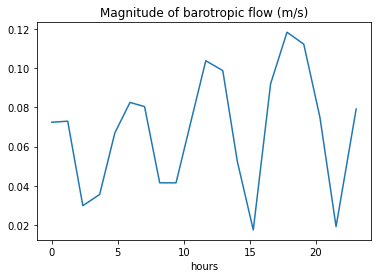

In [188]:
plt.plot((axis["yday"][0, :]-axis["yday"][0, 0])*24, np.sqrt(U**2 + V**2))
plt.title("Magnitude of barotropic flow (m/s)")
plt.xlabel("hours")

In [189]:
U = np.zeros((nz, ny, nx)) + U0relax*(-np.sin(ϕ))*f/ω
V = np.zeros((nz, ny, nx)) + U0relax*(np.cos(ϕ))*f/ω

#### Mixing

In [190]:
# generate 3D vertical eddy diffusivity field
K = np.zeros((nz,ny,nx)) + k0

In [191]:
newds = newds.assign_coords({'Z': z[:,0,0]})
newds['K'] = xr.DataArray(
    K, coords={'Z': newds['Z'], 'Yr': newds['Yr'], 'Xr': newds['Xr']}, dims=['Z', 'Yr', 'Xr']
)

### Tracers

In [200]:
δz = 15.
δx = 200.
δy = 200.

dye_dist = np.sqrt((newds["lon"] - dye_loc[0])**2 + (newds["lat"] - dye_loc[1])**2)
dye_idx = [dye_dist.argmin(dim=["Xr", "Yr"])["Xr"].values, dye_dist.argmin(dim=["Xr", "Yr"])["Yr"].values]
dye_xy = [newds["Xr"][dye_idx[0]].values, newds["Yr"][dye_idx[1]].values]

x0 = dye_xy[0]
y0 = dye_xy[1]
z01 = (Hbot.isel(Xr = dye_idx[0], Yr = dye_idx[1]) + 10.).values
z02 = (Hbot.isel(Xr = dye_idx[0], Yr = dye_idx[1]) + 350.).values
z03 = (Hbot.isel(Xr = dye_idx[0], Yr = dye_idx[1]) + 800.).values

C1 = np.exp(- ((x - x0)/δx)**2 - ((y - y0)/δy)**2 - ((z - z01)/δz)**2)
C2 = np.exp(- ((x - x0)/δx)**2 - ((y - y0)/δy)**2 - ((z - z02)/δz)**2)
C3 = np.exp(- ((x - x0)/δx)**2 - ((y - y0)/δy)**2 - ((z - z03)/δz)**2)

In [201]:
Clabels = ['BLT', 'Crest', 'Interior']
for Clabel, C in zip(Clabels, [C1, C2, C3]):
    newds[Clabel] = xr.DataArray(
        C, coords={'Z': newds['Z'], 'Yr': newds['Yr'], 'Xr': newds['Xr']}, dims=['Z', 'Yr', 'Xr']
    )

In [202]:
newds.to_netcdf(input_path+"geocoords.nc")

## Configuration summary plot

/home/hdrake/.conda/envs/bblturb-analysis/lib/python3.9/site-packages/xarray/plot/plot.py:932: UserWarning: The following kwargs were not used by contour: 'linewidth'
  primitive = ax.contour(x, y, z, **kwargs)
<ipython-input-203-c09f385ab8f8>:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  q = plt.pcolor(x[:,0,:]*1e-3, z[:,0,:]+Hoffset.values,K[:,sec_j,:], norm=matplotlib.colors.LogNorm(vmin=5.e-5, vmax=2.e-3), cmap="plasma")


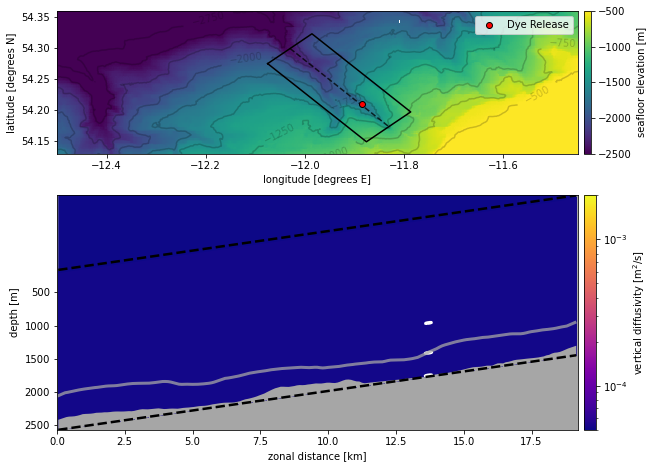

In [203]:
sec_j = ny//2

Hoffset = Hremoved + (Hz-dz0)

scale_fig = 0.6
fig = plt.figure(figsize=(16*scale_fig,11*scale_fig))
gs = fig.add_gridspec(5, 1)

f_ax1 = fig.add_subplot(gs[:2, :])
q = ds['z'].plot.pcolormesh(x='lon', y='lat')
plt.fill_between([-25, -10], [-30, -30], [0, 0], facecolor="w", alpha=0.20)
q.set_rasterized(True)
q.set_clim([-2500, -500])
q.colorbar.remove()
q = (newds['z_actual']).plot(x='lon', y='lat')
q.set_clim([-2500, -500])
q.colorbar.remove()
plt.colorbar(q, pad=0.01, label=r"seafloor elevation [m]")
CS = ds['z'].plot.contour(x="lon", y="lat", colors="k", levels=np.arange(-3000, 0, 250), linewidth=0.5, alpha=0.2, linestyles="solid")
plt.clabel(CS, CS.levels, inline=True, fontsize=10)
plt.plot([newds['lon'].isel(Xr=0, Yr=sec_j), newds['lon'].isel(Xr=-1, Yr=sec_j)], [newds['lat'].isel(Xr=0, Yr=sec_j), newds['lat'].isel(Xr=-1, Yr=sec_j)], "k--", alpha=0.75)

plt.plot(dye_loc[0], dye_loc[1], "ro", label="Dye Release", markeredgecolor="k")
plt.legend()

plt.plot(
    [newds['lon'].isel(Xr=0, Yr=0), newds['lon'].isel(Xr=0, Yr=-1), newds['lon'].isel(Xr=-1, Yr=-1), newds['lon'].isel(Xr=-1, Yr=0), newds['lon'].isel(Xr=0, Yr=0)],
    [newds['lat'].isel(Xr=0, Yr=0), newds['lat'].isel(Xr=0, Yr=-1), newds['lat'].isel(Xr=-1, Yr=-1), newds['lat'].isel(Xr=-1, Yr=0), newds['lat'].isel(Xr=0, Yr=0)],
    "k-"
)

X0 = newds['lon'].isel(Xr=0, Yr=0);
Xx = newds['lon'].isel(Xr=-1, Yr=0);
Xy = newds['lon'].isel(Xr=0, Yr=-1);
Y0 = newds['lat'].isel(Xr=0, Yr=0);
Yx = newds['lat'].isel(Xr=-1, Yr=0);
Yy = newds['lat'].isel(Xr=0, Yr=-1)
# Xa = -14.5; Ya = -22.05;
# plt.arrow(Xa, Ya, (Xx-X0)*0.09, (Yx-Y0)*0.09, head_width = 0.075, head_length = 0.075, width=0.025, color="k")
# plt.arrow(Xa, Ya, (Xy-X0)*0.67, (Yy-Y0)*0.67, head_width = 0.075, head_length = 0.075, width=0.025, color="k")
# plt.annotate(s=r"$x$", xy=(Xa+0.425, Ya-0.11), fontsize=18)
# plt.annotate(s=r"$y$", xy=(Xa-0.25, Ya+0.365), fontsize=18)
plt.title("")
plt.xlabel("longitude [degrees E]")
plt.ylabel("latitude [degrees N]")

plt.xlim([-12.5, -11.45])
plt.ylim([54.13, 54.36])

nancol = (0.65,0.65,0.65)
f_ax1 = fig.add_subplot(gs[2:, :], facecolor=nancol)
q = plt.pcolor(x[:,0,:]*1e-3, z[:,0,:]+Hoffset.values,K[:,sec_j,:], norm=matplotlib.colors.LogNorm(vmin=5.e-5, vmax=2.e-3), cmap="plasma")
plt.xlabel('zonal distance [km]')
plt.ylabel('depth [m]')
plt.colorbar(q, pad=0.01, label=r"vertical diffusivity [m$^{2}$/s]")
plt.fill_between(x[0,0,:]*1e-3, Hremoved - 10, Hbot[sec_j,:]+Hoffset, facecolor=nancol)
plt.fill_between(x[0,0,:]*1e-3, Hremoved + (Hz-50.), np.zeros_like(x[0,0,:])+Hz, facecolor=cm.plasma(0.))

plt.plot(x[0,0,:]*1e-3, Hremoved, "k--", lw=2.5)
plt.plot(x[0,0,:]*1e-3, Hremoved+(Hz-dz0), "k--", lw=2.5)
plt.plot(Hbot['Xr']*1e-3, (Hbot+Hoffset).isel(Yr=np.append(np.arange(-10,0), np.arange(0,10))).mean(dim='Yr'), color=nancol, lw=3.0, alpha=0.75)

plt.contour(x[:,0,:]*1e-3, z[:,0,:]+Hoffset.values, C1[:,ny//2,:], levels=[0.37], colors="w", linewidths=2.5)
plt.contour(x[:,0,:]*1e-3, z[:,0,:]+Hoffset.values, C2[:,ny//2,:], levels=[0.37], colors="w", linewidths=2.5)
plt.contour(x[:,0,:]*1e-3, z[:,0,:]+Hoffset.values, C3[:,ny//2,:], levels=[0.37], colors="w", linewidths=2.5)

# plt.annotate(s="Realistic Release", xy=(40, -4150), color="w", fontsize=13, weight="bold")
# plt.annotate(s="Crest Release", xy=(40, -4600), color="w", fontsize=13, weight="bold")
# plt.annotate(s="Bottom Release", xy=(40, -5050), color="w", fontsize=13, weight="bold")
# plt.annotate(s="DoMORE sill", xy=(385, -3250), color="w", fontsize=13, weight="bold")

plt.yticks(np.arange(-5000, -0, 500), np.arange(5000, 0, -500))

plt.xlim([0, Lx*1e-3])
plt.ylim([Hremoved.min(), (Hremoved + (Hz-dz0)).max()])

plt.tight_layout()

#### Write init files

In [204]:
# Reverse vertical axis so first index is at the surface and transpose axes
U = U[::-1,:,:]
V = V[::-1,:,:]
T = T[::-1,:,:]
R = R[::-1,:1,:1]
K = K[::-1,:,:]

C1 = C1[::-1,:,:]
C2 = C2[::-1,:,:]
C3 = C3[::-1,:,:]
dz = dz[::-1,:1,:1]

# save input data as binary files
newFile = open(input_path+"U.init", "wb")
newFile.write(bytes(U.astype('>f8')))
newFile.close()

newFile = open(input_path+"V.init", "wb")
newFile.write(bytes(V.astype('>f8')))
newFile.close()

newFile = open(input_path+"T.init", "wb")
newFile.write(bytes(T.astype('>f8')))
newFile.close()

np.savetxt(input_path+"R.init", R[:,0,0], encoding="-ascii", fmt='%.7e', newline="\n   ")

newFile = open(input_path+"kappa.init", "wb")
newFile.write(bytes(K.astype('>f8')))
newFile.close()

newFile = open(input_path+"cBLT.init", "wb")
newFile.write(bytes(C1.astype('>f8')))
newFile.close()

newFile = open(input_path+"cCrest.init", "wb")
newFile.write(bytes(C2.astype('>f8')))
newFile.close()

newFile = open(input_path+"cInterior.init", "wb")
newFile.write(bytes(C3.astype('>f8')))
newFile.close()

newFile = open(input_path+"topog.init", "wb")
newFile.write(bytes(Hbot[:,:].values.astype('>f8')))
newFile.close()

newFile = open(input_path+"delZ.init", "wb")
newFile.write(bytes(dz[:,0,0].astype('>f8')))
newFile.close()

#### Final input parameter values

In [205]:
print(f"Coriolis paramter is: f = {f} s^-1")
print(f"Thermal conductivity is: {α} (ºC)^-1$")

print(f"Temperature Lapse Rate is: Γ = {str(gamma)} ºC/m")
print(f"Slope angle is θ = {slopeAngle}")
print(f"Barotropic tidal amplitude is U0 = {str(U0relax)} m/s")
print(f"Barotropic tidal angle (with respect to cross-canyon direction x) is {ϕ} rad")

print(f"Δt < Δz/U0 = {dz0/U0relax} seconds")

Coriolis paramter is: f = 0.00011514324926352239 s^-1
Thermal conductivity is: 0.00014117963593745456 (ºC)^-1$
Temperature Lapse Rate is: Γ = 0.001444072277246354 ºC/m
Slope angle is θ = 0.058817189569051985
Barotropic tidal amplitude is U0 = 0.0472811614557762 m/s
Barotropic tidal angle (with respect to cross-canyon direction x) is 2.1268284479803232 rad
Δt < Δz/U0 = 84.60029061979255 seconds


In [206]:
import os
os.system(f"cp ./gendata_BLT_canyon.ipynb {input_path}");